## Introduction

"There is no friend as loyal as a book.” - Ernest Hemingway
Nowadays with so many books available, it can be hard to select the best ones to read. The
dataset provided is a curation of Goodreads books based on real user information. It can be
used for many tasks like recommending new books or predicting a book’s rating.

## 1/ Data Analysis

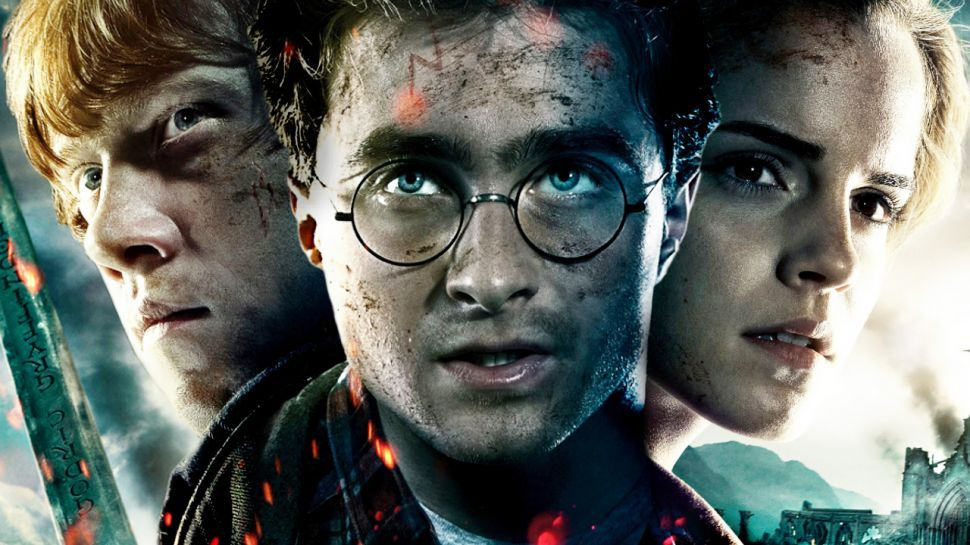

### The packages

In [719]:
# Ignore les warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

## Figures size
from matplotlib import rcParams

# Data processing
import pandas as pd

# Tables, Matrices, Maths
import numpy as np

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
seaborn.set(style="white")

# Tools for the models

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

# the models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

### Reading and explore Datas

In [720]:
### Reading Data
Books = pd.read_csv("books.csv",error_bad_lines=False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [721]:
##copy Data
Books_data=Books.copy()

In [722]:
### Head of data
Books_data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [723]:
## dimensions of data
Books_data.shape

(11123, 12)

In [724]:
###Data colums
Books_data.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [725]:
##infos Data
Books_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


<AxesSubplot:>

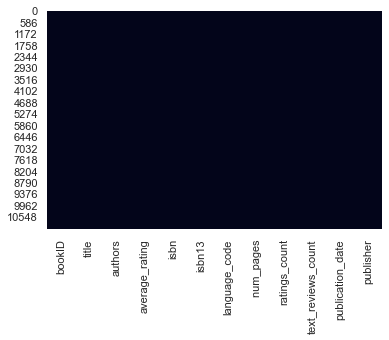

In [726]:
##Missing values
sns.heatmap(Books_data.isna(), cbar=False)

The data is complete, there are no missing values

### Data exploration

##### Index Data

The BookID variable being unique will serve as an index on the lines:

In [727]:
Books_data.index = Books_data["bookID"]

In [728]:
Books_data = Books_data.drop(columns=["bookID"])

#### Quantitatives variables

isbn and isbn13 being unique identifiers for each book, we can delete them from our data because they will not provide any information.

In [729]:
Books_data = Books_data.drop(columns=["isbn"])
Books_data = Books_data.drop(columns=["isbn13"])

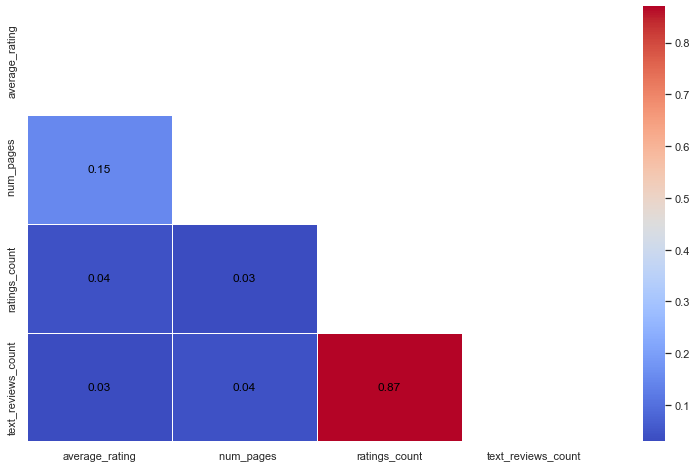

In [730]:
plt.figure(figsize = (13,8))
corr = numpy.round(Books_data.corr(),2) 
blank = numpy.zeros_like(corr)
blank[numpy.triu_indices_from(blank)] = True
with seaborn.axes_style("white"):
    ax = seaborn.heatmap(corr, mask=blank, annot=True, cmap="coolwarm", linewidths=.5, annot_kws={"color":"black"})
plt.show()

We see that there is a strong positive correlation between the variables ratings_count and text_reviews_count (=0.87). So, which means, we have to keep only one of the two variables. We will keep ratings_count

In [731]:
Books_data = Books_data.drop(columns=["text_reviews_count"])

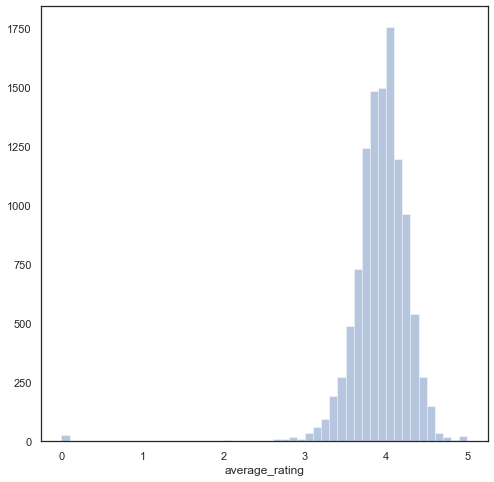

In [732]:
### Average_Rating
plt.figure(figsize=(8,8))
sns.distplot(Books_data["average_rating"], kde=False)
plt.show()

<Figure size 576x576 with 0 Axes>

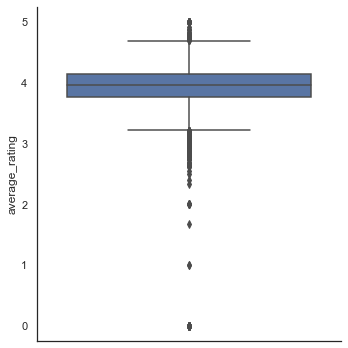

In [733]:
plt.figure(figsize=(8,8))
sns.catplot(data=Books_data,y="average_rating",kind="box")
plt.show()

We can see that the average of the marks is around 4

#### Qualitative Data 

In [734]:
## Language code
print(Books_data["language_code"].nunique())
print(Books_data["language_code"].unique())

27
['eng' 'en-US' 'fre' 'spa' 'en-GB' 'mul' 'grc' 'enm' 'en-CA' 'ger' 'jpn'
 'ara' 'nl' 'zho' 'lat' 'por' 'srp' 'ita' 'rus' 'msa' 'glg' 'wel' 'swe'
 'nor' 'tur' 'gla' 'ale']


So here we see that we have 27 different languages in total

<AxesSubplot:xlabel='language_code', ylabel='count'>

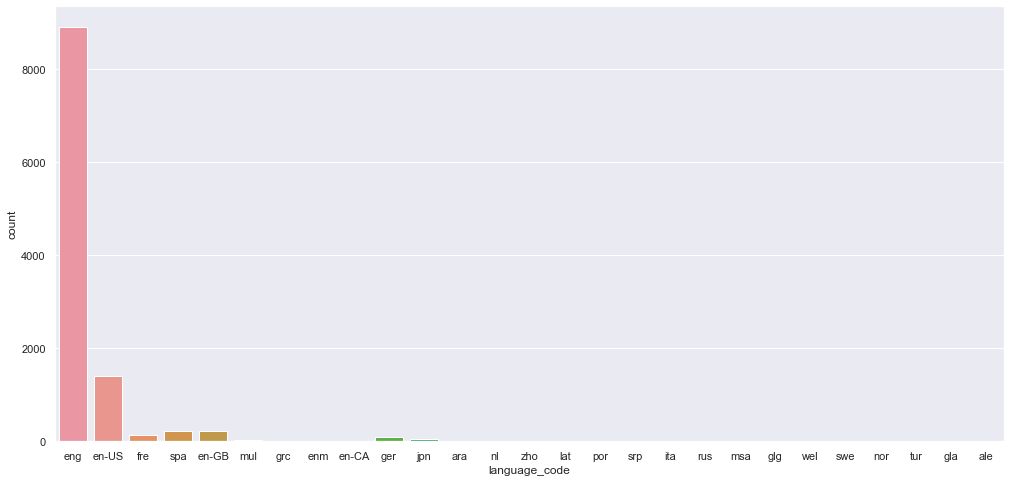

In [735]:
sns.set_style("darkgrid")
rcParams['figure.figsize'] = 17,8
sns.countplot(x=Books_data['language_code'])

In [736]:
### Langage distribution
Count_data=Books_data.groupby(["language_code"]).agg({'language_code': 'count'})
count_data2=Count_data.groupby(level=0).apply(lambda x:x*100 / float(Count_data["language_code"].sum()))
count_data2.rename(columns={"language_code": "percentage"}).sort_values(by="percentage",ascending=False).head(5)

,percentage
language_code,
eng,80.086308
en-US,12.658455
spa,1.959903
en-GB,1.923941
fre,1.294615


We see that most of the books are written in English with 80%

In [737]:
##Publisher
print(Books_data["publisher"].nunique())

2290


In [738]:
Count_data=Books_data.groupby(["publisher"]).agg({'publisher': 'count'})
count_data2=Count_data.groupby(level=0).apply(lambda x:x*100 / float(Count_data["publisher"].sum()))
count_data2.rename(columns={"publisher": "percentage"}).sort_values(by="percentage",ascending=False).head(5)

,percentage
publisher,
Vintage,2.858941
Penguin Books,2.346489
Penguin Classics,1.654230
Mariner Books,1.348557
Ballantine Books,1.294615


In [739]:
### Title
print(Books_data["title"].nunique())

10348


- We have many modality for this variable. out of 11123 data, there are almost 10000 different titles. So this variable is not relevant for our study.
- The date variable will also be removed from our data

In [740]:
Books_data = Books_data.drop(columns=["title"])
Books_data = Books_data.drop(columns=["publication_date"])

In [741]:
##Authors : The name of the author can have an influence on the avering rate
## So we will compose the variable authors by taking the names of the first 3 authors
Books_data["authors_1"]=Books_data['authors'].str.split('/', expand=True).dropna(axis = 1, how = 'all')[0]
Books_data["authors_2"]=Books_data['authors'].str.split('/', expand=True).dropna(axis = 1, how = 'all')[1]
Books_data["authors_3"]=Books_data['authors'].str.split('/', expand=True).dropna(axis = 1, how = 'all')[2]

In [742]:
##So we will delete the authors variable
Books_data = Books_data.drop(columns=["authors"])

We will encode the following variables:
- Langage_code
- Publisher
- authors

In [743]:
##Encodage
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Books_data["language_code"] = labelencoder.fit_transform(Books_data["language_code"])
Books_data["publisher"] = labelencoder.fit_transform(Books_data["publisher"])
Books_data["authors_1"] = labelencoder.fit_transform(Books_data["authors_1"])
Books_data["authors_2"] = labelencoder.fit_transform(Books_data["authors_2"])
Books_data["authors_3"] = labelencoder.fit_transform(Books_data["authors_3"])

##### Split Our data

In [744]:
Books_data.head()

,average_rating,language_code,num_pages,ratings_count,publisher,authors_1,authors_2,authors_3
bookID,,,,,,,,
1,4.57,5,652,2095690,1778,1598,2031,1245
2,4.49,5,870,2153167,1778,1598,2031,1245
4,4.42,5,352,6333,1773,1598,3237,1245
5,4.56,5,435,2339585,1778,1598,2031,1245
8,4.78,5,2690,41428,1773,1598,2031,1245


In [745]:
X = Books_data.drop(columns=["average_rating"])
Y = Books_data["average_rating"]

In [746]:
##We will consider 85% of all the data as training data and the remaining 25% as test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.35, shuffle=True, random_state=0)

In [747]:
##feature sclaing
from sklearn.preprocessing import StandardScaler
simplefilter(action='ignore', category=FutureWarning)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Models

- To have diversity, 4 supervised learning models will be tested. At the end, we will keep the one with the best performance according to the metric we have chosen.
- For the metric, we will choose the one most used for regression. ie the **R2 score** which is a normalized version of the MSE. It is given by:

$$1-\frac{\sum_{i=1}^n(y_i-\hat{y_i})^2}{\sum_{i=1}^n(y_i-\overline{y_i})^2}$$

### RandomForest Model

In [748]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, Y_train) 

RandomForestRegressor(random_state=0)

In [749]:
## Train Prédiction
Y_pred_train=regressor.predict(X_train)
r2_score(Y_train,Y_pred_train)

0.8841341519212358

In [750]:
## test Prédiction
Y_pred_test=regressor.predict(X_test)
r2_score(Y_test,Y_pred_test)

0.18434563090936384

### SVR = Support Vector Regression

In [751]:
regressor = SVR(C=2)
regressor.fit(X_train, Y_train) 

SVR(C=2)

In [752]:
## Train prediction
Y_pred_train=regressor.predict(X_train)
r2_score(Y_train,Y_pred_train)

0.0945674542555115

In [753]:
## Test prediction
Y_pred_test=regressor.predict(X_test)
r2_score(Y_test,Y_pred_test)

0.03954537050810003

### KNeighborsRegressor

In [754]:
regressor = KNeighborsRegressor(n_neighbors=1)
regressor.fit(X_train, Y_train) 

KNeighborsRegressor(n_neighbors=1)

In [755]:
## Train prediction
Y_pred_train=regressor.predict(X_train)
r2_score(Y_train,Y_pred_train)

0.9999995390605555

In [756]:
## test prediction
Y_pred_test=regressor.predict(X_test)
r2_score(Y_test,Y_pred_test)

-0.5658621157627435

The RandomForest seems to be the most efficient model on the training data as well as on the test data on all the 4 models tested.
So it will be used and to increase the performance of the model for its generalization, we can do parameter tuning.

#### Tuning parameters


In [ ]:
param_grid = {'max_depth': [3, 5, 6], 'max_features': [2,4,6],'n_estimators':[50,100],'min_samples_split': [3, 5, 6]}
RF_grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, refit=True, verbose=0)
RF_grid.fit(X_train,Y_train)

In [621]:
y_pred_test=RF_grid.best_estimator_.predict(X_test)

In [622]:
r2_score(Y_test,y_pred_test)

0.17750255742877064